In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 93s 0us/step


In [13]:
data_dir

WindowsPath('datasets/flower_photos')

In [11]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir
print(data_dir)

datasets\flower_photos


In [16]:
image_files = list(data_dir.glob('*/**/*.jpg'))
image_files

[WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos

In [17]:
len(image_files)

3670

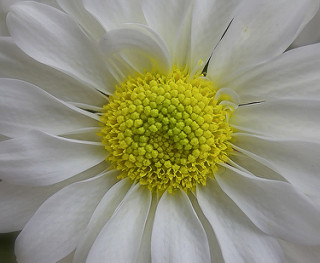

In [21]:
import PIL.Image


imag1=str(image_files[0])
PIL.Image.open(imag1)


In [27]:
print(data_dir)  # Check the full path to confirm it's correct


datasets\flower_photos


In [32]:
flowers_images_dict = {
    'roses': list(data_dir.glob('*/roses/*')),
    'daisy': list(data_dir.glob('*/daisy/*')),
    'dandelion': list(data_dir.glob('*/dandelion/*')),
    'sunflowers': list(data_dir.glob('*/sunflowers/*')),
    'tulips': list(data_dir.glob('*/tulips/*')),
}


In [35]:
len(flowers_images_dict['daisy'])

633

In [36]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [39]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
#opencv reads image in BGR format and convert into RGB format

In [40]:
cv2.resize(img,(180,180)).shape
#to have uniform distribution of image size

(180, 180, 3)

In [41]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [42]:
X=np.array(X)
y=np.array(y)

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [44]:
len(x_train)

2752

In [45]:
#images are divided by 255 to get the scaling
x_train_scaled=x_train/255
x_test_scaled=x_test/255


In [47]:
from tensorflow.keras import datasets,layers,models

In [53]:
# Define the model
model = models.Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # Softmax for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Use from_logits=False
              metrics=['accuracy'])

# Fit the model
model.fit(x_train_scaled, y_train, epochs=30)


Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 174ms/step - accuracy: 0.3639 - loss: 1.4692
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - accuracy: 0.5971 - loss: 1.0184
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 190ms/step - accuracy: 0.6983 - loss: 0.7924
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.7748 - loss: 0.5836
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 172ms/step - accuracy: 0.8743 - loss: 0.3874
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.9350 - loss: 0.2016
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 174ms/step - accuracy: 0.9593 - loss: 0.1368
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.9766 - loss: 0.0836
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.9873 - loss: 0.0552
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 171ms/step - accuracy: 0.9967 - loss: 0.0300
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step - accuracy: 0.9949 - loss: 0.0193
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 15

In [54]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6738 - loss: 2.3446


[2.238095283508301, 0.6830065250396729]

In [55]:
predictions = model.predict(x_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


array([[1.95461181e-09, 9.99999642e-01, 2.27423939e-07, 7.36201566e-15,
        1.10539467e-07],
       [8.84018958e-01, 3.08468134e-06, 2.90983748e-11, 6.39625478e-06,
        1.15971535e-01],
       [1.78546122e-09, 9.40836955e-08, 9.99999881e-01, 4.24783507e-11,
        6.45096776e-09],
       ...,
       [8.32298025e-03, 2.00330443e-03, 1.52455470e-07, 9.86801863e-01,
        2.87174620e-03],
       [4.18676317e-01, 5.80731452e-01, 2.34444201e-06, 5.49670542e-04,
        4.02653131e-05],
       [3.79049396e-07, 3.36113581e-09, 2.63103502e-05, 9.98459458e-01,
        1.51384331e-03]], dtype=float32)

In [57]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.14884761, 0.40460956, 0.14884764, 0.14884761, 0.14884762],
      dtype=float32)>

In [58]:
np.argmax(score)

1

In [59]:
y_test[0]

1

In [65]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

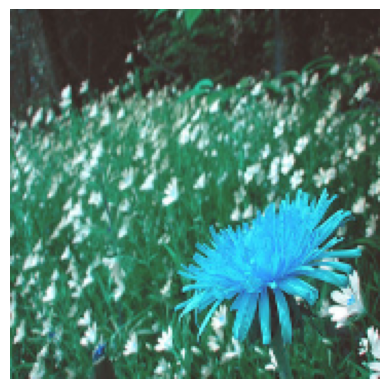

In [61]:
plt.axis('off')
plt.imshow(x_train[0])

In [66]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[0.00000000e+00, 4.59200668e+00, 0.00000000e+00],
        [1.43607169e-01, 4.14360714e+00, 0.00000000e+00],
        [4.06769291e-02, 4.04067707e+00, 0.00000000e+00],
        ...,
        [1.92354441e+00, 1.09802074e+01, 9.80208039e-01],
        [1.83526695e+00, 1.16286783e+01, 2.43376255e+00],
        [1.04551327e+00, 9.76084900e+00, 2.95448661e+00]],

       [[0.00000000e+00, 4.19490814e+00, 0.00000000e+00],
        [0.00000000e+00, 4.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 4.00000000e+00, 0.00000000e+00],
        ...,
        [2.00000000e+00, 1.15999384e+01, 1.61903644e+00],
        [1.74154663e+00, 1.03524742e+01, 1.50817060e+00],
        [1.00000000e+00, 8.04123688e+00, 2.73268557e+00]],

       [[0.00000000e+00, 5.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 4.63285828e+00, 0.00000000e+00],
        [0.00000000e+00, 4.17948532e+00, 0.00000000e+00],
        ...,
        [2.00000000e+00, 1.27074

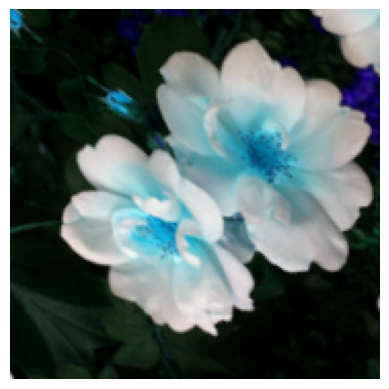

In [70]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [71]:
# Define the model
model = models.Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # Softmax for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Use from_logits=False
              metrics=['accuracy'])

# Fit the model
model.fit(x_train_scaled, y_train, epochs=30)


Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 248ms/step - accuracy: 0.3755 - loss: 1.5059
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 247ms/step - accuracy: 0.5680 - loss: 1.0857
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 19s 222ms/step - accuracy: 0.5971 - loss: 0.9874
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 18s 212ms/step - accuracy: 0.6354 - loss: 0.9251
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 200ms/step - accuracy: 0.6631 - loss: 0.8772
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.7025 - loss: 0.7865
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.7143 - loss: 0.7640
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.6970 - loss: 0.7476
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 199ms/step - accuracy: 0.7091 - loss: 0.7258
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.7349 - loss: 0.6692
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17s 202ms/step - accuracy: 0.7443 - loss: 0.6793
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 17

In [72]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7059 - loss: 0.8036


[0.8462690114974976, 0.7124183177947998]